## Data Preparation 

In [7]:
import JuliaDB
using JuliaDB: ML
const Jdb = JuliaDB

JuliaDB

In [8]:
iris = Jdb.loadtable("iris.csv",escapechar='"')

Table with 150 rows, 5 columns:
SepalLength  SepalWidth  PetalLength  PetalWidth  Species
─────────────────────────────────────────────────────────────
5.1          3.5         1.4          0.2         "setosa"
4.9          3.0         1.4          0.2         "setosa"
4.7          3.2         1.3          0.2         "setosa"
4.6          3.1         1.5          0.2         "setosa"
5.0          3.6         1.4          0.2         "setosa"
5.4          3.9         1.7          0.4         "setosa"
4.6          3.4         1.4          0.3         "setosa"
5.0          3.4         1.5          0.2         "setosa"
4.4          2.9         1.4          0.2         "setosa"
4.9          3.1         1.5          0.1         "setosa"
5.4          3.7         1.5          0.2         "setosa"
4.8          3.4         1.6          0.2         "setosa"
⋮
6.9          3.1         5.4          2.1         "virginica"
6.7          3.1         5.6          2.4         "virginica"
6.9          3

In [9]:
ML.schema(iris)

Dict{Symbol,Any} with 5 entries:
  :SepalLength => Continous(μ=5.843333333333333, σ=0.8280661279778638)
  :SepalWidth  => Continous(μ=3.0573333333333315, σ=0.43586628493669777)
  :PetalWidth  => Continous(μ=1.1993333333333336, σ=0.7622376689603466)
  :PetalLength => Continous(μ=3.758, σ=1.7652982332594667)
  :Species     => nothing

In [10]:
iris_schema = ML.schema(iris,hints = Dict(
        :Species => ML.Categorical
    )
)

Dict{Symbol,Any} with 5 entries:
  :SepalLength => Continous(μ=5.843333333333333, σ=0.8280661279778638)
  :SepalWidth  => Continous(μ=3.0573333333333315, σ=0.43586628493669777)
  :PetalWidth  => Continous(μ=1.1993333333333336, σ=0.7622376689603466)
  :PetalLength => Continous(μ=3.758, σ=1.7652982332594667)
  :Species     => Categorical(["setosa", "versicolor", "virginica"])

In [11]:
input_schema, output_schema = ML.splitschema(iris_schema,:Species)

┌ Warning: In `filter(f, dict)`, `f` is now passed a single pair instead of two arguments.
│   caller = splitschema(::Dict{Symbol,Any}, ::Symbol) at ml.jl:155
└ @ JuliaDB.ML /Users/ppalmes/.julia/packages/JuliaDB/jDAlJ/src/ml.jl:155
┌ Warning: In `filter(f, dict)`, `f` is now passed a single pair instead of two arguments.
│   caller = splitschema(::Dict{Symbol,Any}, ::Symbol) at ml.jl:155
└ @ JuliaDB.ML /Users/ppalmes/.julia/packages/JuliaDB/jDAlJ/src/ml.jl:155


(Dict{Symbol,Any}(:SepalLength=>Continous(μ=5.843333333333333, σ=0.8280661279778638),:SepalWidth=>Continous(μ=3.0573333333333315, σ=0.43586628493669777),:PetalWidth=>Continous(μ=1.1993333333333336, σ=0.7622376689603466),:PetalLength=>Continous(μ=3.758, σ=1.7652982332594667)), Dict{Symbol,Any}(:Species=>Categorical(["setosa", "versicolor", "virginica"])))

In [12]:
input = ML.featuremat(input_schema,iris)

4×150 LinearAlgebra.Adjoint{Float32,Array{Float32,2}}:
 -0.897674  -1.1392    -1.38073   …   0.793012  0.430722   0.0684325
  1.0156    -0.131539   0.327318     -0.131539  0.786174  -0.131539 
 -1.31105   -1.31105   -1.31105       1.05042   1.44399    0.788031 
 -1.33575   -1.33575   -1.3924        0.816859  0.930154   0.760211 

In [13]:
output = ML.featuremat(output_schema,iris)

3×150 LinearAlgebra.Adjoint{Float32,Array{Float32,2}}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [14]:
using Random
function partitionTrainTest(input,output, at = 0.8)
    @assert size(input,2) == size(output,2)
    n = size(input,2)
    idx = shuffle(1:n)
    train_idx = view(idx, 1:floor(Int, at*n))
    test_idx = view(idx, (floor(Int, at*n)+1):n)
    return input[:,train_idx], output[:,train_idx], input[:,test_idx],output[:,test_idx]
end

partitionTrainTest (generic function with 2 methods)

In [15]:
train_input,train_output,test_input,test_output = partitionTrainTest(input,output,0.7)

(Float32[1.03454 -1.01844 … -0.414621 0.309959; 0.0978893 0.786174 … -1.04925 -0.131539; 0.26326 -1.31105 … 0.000874618 0.788031; 0.363678 -1.2791 … 0.363678 0.646916], Float32[0.0 1.0 … 0.0 0.0; 1.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0], Float32[2.24217 -0.173094 … 2.24217 1.39683; -0.590395 -0.360967 … 1.70389 0.327318; 1.05042 0.132067 … 1.3128 0.26326; 1.66657 0.250383 … 1.66657 0.533621], Float32[0.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 1.0; 1.0 0.0 … 1.0 0.0])

## Use Flux

In [55]:
import Flux
const Fx = Flux

Flux

In [77]:
model = Fx.Chain(
    Fx.Dense(ML.width(input_schema),5,Fx.relu),
    Fx.Dense(5,ML.width(output_schema)),
    Fx.softmax
)

loss(x, y) = Flux.mse(model(x), y)
#loss(x,y) = Fx.crossentropy(model(x),y)
opt = Flux.ADAM(Flux.params(model))

┌ Warning: ADAM(params) is deprecated; use ADAM(η::Float64) instead
│   caller = top-level scope at In[77]:8
└ @ Core In[77]:8


#24 (generic function with 1 method)

In [78]:
data = [(train_input, train_output)] |> gpu;

In [81]:
evalcb = Fx.throttle(() -> @show(loss(first(data)...)), 0.2);
for i = 1:1000
  Fx.train!(loss, data, opt, cb = evalcb)
end

loss(first(data)...) = 0.24238965f0 (tracked)
loss(first(data)...) = 0.24238965f0 (tracked)
loss(first(data)...) = 0.24238965f0 (tracked)


In [82]:
using Statistics

yhat=Fx.argmax(model(test_input))
y=Fx.argmax(test_output)
fx_accuracy = mean(y .== yhat) * 100
print("accuracy: ",fx_accuracy)

accuracy: 15.555555555555555

┌ Warning: `argmax(...) is deprecated, use `onecold(...)` instead.
│   caller = top-level scope at In[82]:2
└ @ Core In[82]:2
┌ Warning: `argmax(...) is deprecated, use `onecold(...)` instead.
│   caller = top-level scope at In[82]:4
└ @ Core In[82]:4


## Using TensorFlow

In [1]:
using TensorFlow
using Distributions

In [2]:
using MLDatasets
import Random

mutable struct DataLoader
    cur_id::Int
    order::Vector{Int}
end

DataLoader() = DataLoader(1, Random.shuffle(1:60000))

function next_batch(loader::DataLoader, batch_size)
    x = zeros(Float32, batch_size, 784)
    y = zeros(Float32, batch_size, 10)
    for i in 1:batch_size
        data, label = MLDatasets.MNIST.traindata(loader.order[loader.cur_id])
        x[i, :] = reshape(data, (28*28))
        y[i, Int(label)+1] = 1.0
        loader.cur_id += 1
        if loader.cur_id > 60000
            loader.cur_id = 1
        end
    end
    x, y
end

function load_test_set(N=10000)
    x = zeros(Float32, N, 784)
    y = zeros(Float32, N, 10)
    for i in 1:N
        data, label = MLDatasets.MNIST.testdata(i)
        x[i, :] = reshape(data, (28*28))
        y[i, Int(label)+1] = 1.0
    end
    x,y
end

load_test_set (generic function with 2 methods)

In [6]:
loader = DataLoader()

sess = Session(Graph())

x = placeholder(Float32)
y_ = placeholder(Float32)

W = Variable(zeros(Float32, 784, 10))
b = Variable(zeros(Float32, 10))

run(sess, global_variables_initializer())

y = nn.softmax(x*W + b)

cross_entropy = reduce_mean(-reduce_sum(y_ .* log(y), axis=[2]))
train_step = train.minimize(train.GradientDescentOptimizer(.00001), cross_entropy)

correct_prediction = argmax(y, 2) .== argmax(y_, 2)
accuracy=reduce_mean(cast(correct_prediction, Float32))

2019-04-26 22:56:05.828595: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.2 AVX AVX2 FMA
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = (::getfield(Serialization.__deserialized_types__, Symbol("##7#8")))() at TensorFlow.jl:189
└ @ Main ~/.julia/packages/TensorFlow/q9pY2/src/TensorFlow.jl:189
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = make_py_graph(::Array{UInt8,1}) at py.jl:51
└ @ Main ~/.julia/packages/TensorFlow/q9pY2/src/py.jl:51
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller =

<Tensor reduce_3:1 shape=unknown dtype=Float32>

In [ ]:
for i in 1:10
    batch = next_batch(loader, 100)
    run(sess, train_step, Dict(x=>batch[1], y_=>batch[2]))
end

testx, testy = load_test_set()

println(run(sess, accuracy, Dict(x=>testx, y_=>testy)))

## Using Knet

In [2]:
import Knet
using Flux: argmax

┌ Info: Precompiling Knet [1902f260-5fb4-5aff-8c31-6271790ab950]
└ @ Base loading.jl:1192


In [3]:
Atype = Knet.gpu() >= 0 ? KnetArray{Float32} : Array{Float32}
# setup weight parameters
# iris data: input=>4, hidden=>5, output=>3,
wmlp=map(Atype, [ 0.1*randn(5,4), zeros(5,1),
                  0.1*randn(3,5),  zeros(3,1) ])

4-element Array{Array{Float32,2},1}:
 [0.0743644 -0.0904959 -0.0999296 -0.0962196; 0.0756233 0.1305 0.0355859 -0.147267; … ; 0.0670305 -0.235665 -0.0431451 0.0317444; 0.107203 0.0196627 -0.09373 -0.0625429]
 [0.0; 0.0; … ; 0.0; 0.0]                                                                                                                                                
 [-0.089309 0.0603609 … -0.116096 -0.178503; -0.0333412 -0.0582998 … -0.00667422 -0.0340108; 0.092459 0.0448854 … -0.091398 0.156921]                                    
 [0.0; 0.0; 0.0]                                                                                                                                                         

In [4]:
function knetpredict(w,x)
    for i=1:2:length(w)
        x = w[i]*Knet.mat(x) .+ w[i+1]
        if i<length(w)-1
            x = max.(0,x)
        end
    end
    return x
end

knetpredict (generic function with 1 method)

In [5]:
# SGD training loop
function train!(w, data; lr=.1)
    for (x,y) in data
        dw = lossgradient(w, x, y)
        for i in 1:length(w)
            w[i] -= lr * dw[i]
        end
    end
    return w
end


train! (generic function with 1 method)

In [6]:
loss(w,x,ygold) = Knet.nll(knetpredict(w,x),ygold); # nll is negative log likelihood
lossgradient = Knet.grad(loss);

In [16]:
x=train_input
ygold=argmax(train_output)

loss(wmlp,x,ygold)

@time weights = [ copy(train!(wmlp, [(x, ygold)])) for epoch=1:1000 ]

losses = [ loss(w,x,ygold) for w in weights ]

┌ Warning: `argmax(...) is deprecated, use `onecold(...)` instead.
│   caller = top-level scope at In[16]:2
└ @ Core In[16]:2


  3.091057 seconds (8.53 M allocations: 450.637 MiB, 6.77% gc time)


1000-element Array{Float32,1}:
 1.0958363  
 1.0919127  
 1.0886558  
 1.0855064  
 1.0824982  
 1.0794066  
 1.0761452  
 1.072549   
 1.0686688  
 1.064456   
 1.059736   
 1.0545866  
 1.0489719  
 ⋮          
 0.054413546
 0.054396864
 0.054380227
 0.05436361 
 0.054347042
 0.054330528
 0.054314036
 0.054297596
 0.054281197
 0.05426483 
 0.05424852 
 0.05423224 

In [18]:
println("losses:")
println("====")
[x for x in losses[end-10:end]]

losses:
====


11-element Array{Float32,1}:
 0.054396864
 0.054380227
 0.05436361 
 0.054347042
 0.054330528
 0.054314036
 0.054297596
 0.054281197
 0.05426483 
 0.05424852 
 0.05423224 

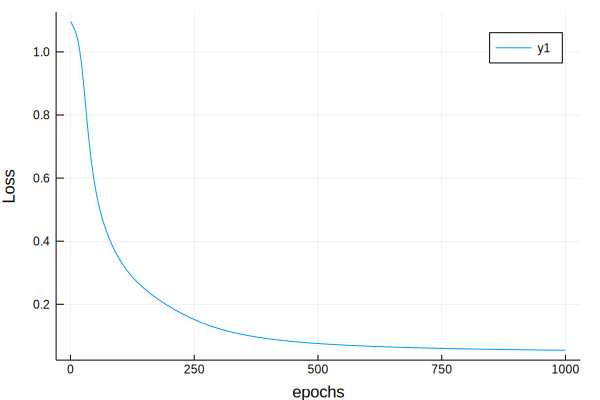

In [19]:
using Plots
gr()
Plots.plot(losses,xlabel="epochs",ylabel="Loss")

In [65]:
res=argmax(knetpredict(wmlp,train_input)) .== argmax(train_output)
sum(res)/length(res)*100

┌ Warning: `argmax(...) is deprecated, use `onecold(...)` instead.
│   caller = top-level scope at In[65]:1
└ @ Core In[65]:1
┌ Warning: `argmax(...) is deprecated, use `onecold(...)` instead.
│   caller = top-level scope at In[65]:1
└ @ Core In[65]:1


97.14285714285714

In [66]:
res=argmax(knetpredict(wmlp,test_input)) .== argmax(test_output)
k_accuracy = sum(res)/length(res)*100

┌ Warning: `argmax(...) is deprecated, use `onecold(...)` instead.
│   caller = top-level scope at In[66]:1
└ @ Core In[66]:1
┌ Warning: `argmax(...) is deprecated, use `onecold(...)` instead.
│   caller = top-level scope at In[66]:1
└ @ Core In[66]:1


95.55555555555556